# 正则表达式
## 正则表达式基础
>Regular Expression, 在代码中常简写为 regex, regexp 或 re, 是计算机科学的一个概念。  

### 正则表达式基本元字符

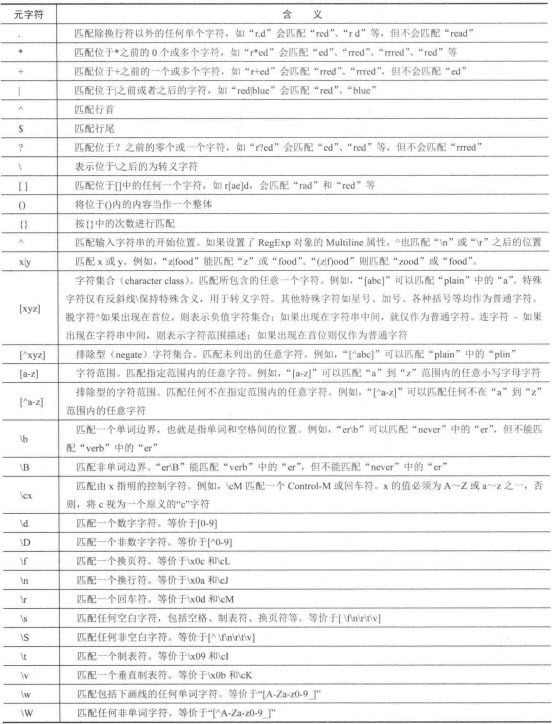

原始字符串是为正则表达式设计的，以提高正则表达式的可读性，减少“\”在正则表达式中的数目。在正则表达式中"\b"表示匹配一个单词的开始或者结束，而在字符串中“\b”则表示退格。 如果在正则表达式中使用“\b”，则应该写成  
```python
re.compile('\\ba.?')
```
如果使用原始字符串，则写法如下：  
```python
re.compile(r'\ba.?')
```

### 常用正则表达式

手机号匹配，前两位是13，第三位是0,1，或2，再加上8位数字  
```bash
13[0-2][0-9]{8}
```
匹配一个文件中所有的网址
```python
#(http://www|www) 使用"()"表示作为一个整体，使用|表示其中任何一个满足则匹配
# [a-z0-9-] 表示字母，数字或者“-”,“*”表示匹配0个或多个前边的字符
# [a-z]{2,3}表示重复两次或者三次
(http://www|www)\.[a-z0-9-]*\.[a-z]{2,3}
```

## re模块
### 正则匹配搜索函数

``` python
re.match()#函数用于在字符串中匹配正则表达式，如何匹配成功，则返回MatchObject对象实例。
re.search()#函数用于在字符串中查找正则表达式，如果找到则返回MatchObject对象实例。
re.findall()#函数用于在字符串中查找所有符合正则表达式的字符串，并返回这些字符串的列表
```
> re.match()函数和re.search()函数的作用基本一样。不同的是，re.match()函数只从字符串中的第一个字符串开始匹配。而re.search()函数则搜索整个字符串

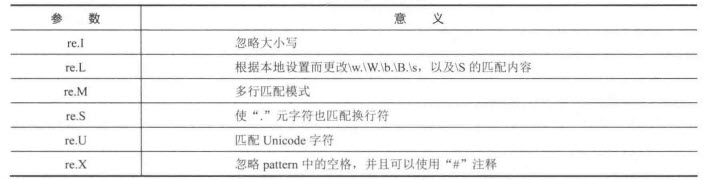

In [2]:
import re
s = "Life can be good"
print(re.match('can',s)) # 在字符串中匹配'can'，输出none表示未找到

None


In [3]:
print(re.search('can',s)) #在字符串中搜索'can'并返回一个Match object, 表示找到

<_sre.SRE_Match object; span=(5, 8), match='can'>


In [4]:
print(re.match('l.*',s)) #匹配任何以字母“l”开头的字符串

None


In [5]:
print(re.match('l.*',s,re.I)) # 此处设置表示忽略大小写

<_sre.SRE_Match object; span=(0, 16), match='Life can be good'>


In [6]:
print(re.findall('[a-z]{3}',s)) #查找所有三个字母的小写字符串

['ife', 'can', 'goo']


In [7]:
print(re.findall('[a-z]{1,3}',s)) #查找所有由1到3个字母组成的小写字符串

['ife', 'can', 'be', 'goo', 'd']


### sub()与subn()函数
- re.sub() 函数用于替换在字符串中符合正则表达式的内容，它返回替换后的字符串。
- re.subn()函数与re.sub()函数相同，只不过re.subn()函数将返回一个元组来保存替换的结果和替换次数。

In [8]:
import re
s = "Life can be bad"

In [9]:
re.sub('bad','good',s) # 用good替换bad

'Life can be good'

In [10]:
re.sub('bad|be',"good",s)# 用good替换bad或者be

'Life can good good'

In [11]:
re.sub('bad|be',"good",s,1)#用good替换bad或者be，只替换一次

'Life can good bad'

In [12]:
re.subn('bad|be',"good",s,1)#用good替换bad或者be，只替换一次
#返回由替换后的字符串和替换的次数组成的数组

('Life can good bad', 1)

In [13]:
r = re.subn('bad|be','good',s)
print(r)

('Life can good good', 2)


### Split()函数
- split()函数用于分割字符串，它返回分割后的字符串列表。

In [14]:
import re
s = "Life can be bad"

In [15]:
re.split(' ',s)

['Life', 'can', 'be', 'bad']

In [16]:
r = re.split(' ',s,1)# 只分割一次
print(r)

['Life', 'can be bad']


In [17]:
re.split('b',s)# 使用‘b’作为分隔符

['Life can ', 'e ', 'ad']

### 正则表达式对象
- 对于多次使用的正则表达式，使用re.compile()编译后的对象实例，可以提高处理或匹配的速度

In [18]:
import re
re.compile('a*b',re.I|re.X) #编译正则表达式，忽略大小写和模式中空格

re.compile(r'a*b', re.IGNORECASE|re.UNICODE|re.VERBOSE)

In [19]:
import re

re.compile('''
\b          #匹配单词开始
AA?         #以A或者AA开头
\d          #匹配一个数字i
\w*         #匹配任意字符
            #一个空行
\b          #匹配单词结束
''',re.X)

re.compile(r'\n\x08          #匹配单词开始\nAA?         #以A或者AA开头\n\d          #匹配一个数字i\n\w*         #匹配任意字符\n            #一个空行\n\x08          #匹配单词结束\n',
re.UNICODE|re.VERBOSE)

- 正则表达式对象也是一个类，具有自己的方法。正则表达式对象的方法与re模块中提供的函数基本相同

In [20]:
import re
r = re.compile('go*d')

In [21]:
print(r.match('Life can be good!')) 
#没有返回值，表示匹配失败

None


In [22]:
print(r.match('Life can be good!',12)) 
#返回match对象实例，表示字符串匹配成功

<_sre.SRE_Match object; span=(12, 16), match='good'>


In [23]:
# 在字符串中进行搜索
r.search('Life can be good')

<_sre.SRE_Match object; span=(12, 16), match='good'>

In [24]:
# 匹配两个字母后跟一个空格，然后再跟一个字母g的情况
r = re.compile('\w.\sg') 
r.search('Life can be good')

<_sre.SRE_Match object; span=(9, 13), match='be g'>

In [25]:
# 匹配后面有一个空字符的任意包含两个或者三个字符的单词
# \b 表示匹配单词的边界。 ?表示匹配0个或者1个前边的字符。
r = re.compile('\\b\w..?\s')
r.findall('Life can be good')

['can ', 'be ']

In [26]:
s = '''Life can be good;
Life can be bad;
Life is mostly cheerful;
But somethimes sad.'''
r = re.compile('b\w*',re.I) #匹配b开肉的任何单词
# \w为包括下划线的任何单词字符，*号意味着0个或者多个这样的字符。这样就匹配直到遇见空格字符串
new = r.sub('*',s)
print(new)

Life can * good;
Life can * *;
Life is mostly cheerful;
* somethimes sad.


In [27]:
new = r.sub('*',s,2) #只在字符串中匹配两次
print(new)

Life can * good;
Life can * bad;
Life is mostly cheerful;
But somethimes sad.


In [28]:
r = re.compile('b\w*') #重新编译，不忽略大小写
new = r.subn('*',s)
print(new[0])
print(new[1])

Life can * good;
Life can * *;
Life is mostly cheerful;
But somethimes sad.
3


In [29]:
new = r.subn('*',s,1)#只在字符串中替换一次
print(new[0])
print(new[1])

Life can * good;
Life can be bad;
Life is mostly cheerful;
But somethimes sad.
1


In [30]:
r = re.compile('\s')
news = r.split(s)
print(news)

['Life', 'can', 'be', 'good;', 'Life', 'can', 'be', 'bad;', 'Life', 'is', 'mostly', 'cheerful;', 'But', 'somethimes', 'sad.']


In [31]:
news = r.split(s,4)# 只分割四次
for new in news:
    print(new)

Life
can
be
good;
Life can be bad;
Life is mostly cheerful;
But somethimes sad.


In [32]:
r = re.compile('b\w*',re.I) #编译匹配以字母b开头的字符串,忽略大小写
news = r.split(s)
for new in news:
    print(new)

Life can 
 good;
Life can 
 
;
Life is mostly cheerful;

 somethimes sad.


In [33]:
news = r.split(s,1)
for new in news:
    print(new)

Life can 
 good;
Life can be bad;
Life is mostly cheerful;
But somethimes sad.


In [34]:
r = re.compile('\w*e',re.I) #编译匹配以字母‘e’结尾的字符串，忽略大小写
news = r.split(s)
print(news)

['', ' can ', ' good;\n', ' can ', ' bad;\n', ' is mostly ', 'rful;\nBut ', 's sad.']


---
## 分组匹配与匹配对象使用
- 在正则表达式中以一对圆括号“()”来表示位于其中的内容属于一个分组。

In [35]:
import re
s = 'Phone No. 010-87654321'
r = re.compile(r'(\d+)-(\d+)')
m = r.search(s)
print(m.group(1))
print(m.group(2))
print(m.group())

010
87654321
010-87654321


- 在正则表达式中，可以通过使用“(?P<组名>)”为组设置一个名字

In [36]:
import re
s = 'Phone No. 010-87654321'
r = re.compile(r'(?P<Area>\d+)-(?P<No>\d+)')
m = r.search(s)
m.groupdict()

{'Area': '010', 'No': '87654321'}

### 分组拓展语法

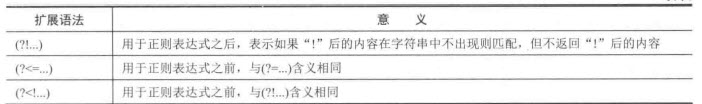
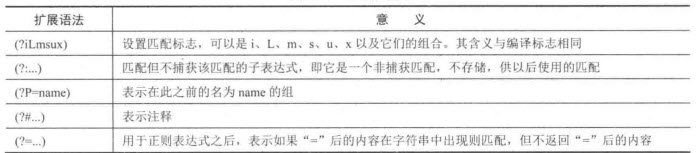

In [69]:
import re
s = '''Life can be good;
Life can be bad;
Life is mostly cheerful;
But sometimes sad.
'''

In [70]:
r = re.compile(r'be(?=\sgood)') #编译正则表达式，只匹配其后单词为“good”的be
m = r.search(s)
m.span() #输出匹配的位置

(9, 11)

In [71]:
r.findall(s) #使用findall()方法输出所有匹配的单词

['be']

In [72]:
r = re.compile('be') #重新编译正则表达式，匹配单词'be'
r.findall(s)


['be', 'be']

In [73]:
r = re.compile(r'be(?!\sgood)') #匹配之后单词不为“good”的be
m = r.search(s)
m.span()

(27, 29)

In [74]:
r = re.compile(r'(?:can\s)be(\sgood)') #使用组来匹配“be good”
m = r.search(s)
m.groups()

(' good',)

In [75]:
r = re.compile(r'(?P<first>\w)(?P=first)') #使用组名重复，此处匹配具备有两个重复字母的单词
r.findall(s)

['o', 'e']

In [76]:
r = re.compile(r'(?<=can\s)b\w*\b') #匹配以字母b开头，在can之后的单词
r.findall(s)

['be', 'be']

In [77]:
r = re.compile(r'(?<!can\s>)(?i)b\w*\b') #重新编译，忽略大小写
r.findall(s)

['be', 'be', 'bad', 'But']

### 匹配对象与组的使用
- group(),groups(),groupdict()方法都是处理分组的情况。
- group()返回值为字符串，当传递多个参数时，返回值为元组。
- groups()的返回值为元组
- groupdict()的返回值为字典

In [46]:
import re
s = '''Life can be dreams,
Life can be great thoughts;
Life can mean a person,
Sitting in a court.'''

In [47]:
 r = re.compile('\\b(?P<first>\w+)a(\w+)\\b') #编译正则表达式，匹配所有包含字母'a'的单词

In [48]:
r.findall(s)

[('c', 'n'), ('dre', 'ms'), ('c', 'n'), ('gre', 't'), ('c', 'n'), ('me', 'n')]

In [49]:
m = r.search(s)
m.groupdict() #使用groupdict() 输出字典

{'first': 'c'}

In [50]:
m.groups()

('c', 'n')

In [51]:
m = r.search(s,9) #从指定位置开始重新搜索
m.group() #输出匹配到的字符串

'dreams'

In [52]:
m.group(1) #输出第一对圆括号中的内容，即字母“a”之前部分

'dre'

In [53]:
m.group(2)# 输出第二对圆括号中的内容，即字母“a”之后的部分

'ms'

In [54]:
m.group(1,2)#全部输出，返回一个元组

('dre', 'ms')

In [55]:
m.groupdict() #输出字典

{'first': 'dre'}

In [56]:
m.groups() #使用groups()输出元组

('dre', 'ms')

### 匹配对象与索引使用
- start(),end(),span()方法返回所匹配的子字符串的索引

In [57]:
import re
s = '''Life can be dreams,
Life can be great thoughts;
Life can mean a person,
Sitting in a court.'''
r = re.compile('\\b(?P<first>\w+)a(\w+)\\b') #编译正则表达式匹配含有字母"a"的单词

In [58]:
m = r.search(s,9)
m.start()

12

In [59]:
m.start(1)

12

In [60]:
m.start(2)

16

In [61]:
m.end(1)

15

In [62]:
m.end()

18

In [63]:
m.span() #输出子字符串的开始和结束位置

(12, 18)

In [64]:
m.span(1) #输出第一组子字符串的开始和结束位置

(12, 15)

In [65]:
m.span(2) #输出第二组子字符串的开始和结束位置

(16, 18)

## 正则表达式应用实例
- 运用正则表达式分析并获取Python程序中定义的所有方法和变量
- 一些预备知识
>贪婪模式，就是在整个表达式匹配成功的前提下，尽可能多的匹配。  
 非贪婪模式，就是在整个表达式匹配成功的前提下，尽可能少的匹配

In [66]:
s="<H1>Chapter 1 - 介绍正则表达式</H1>"
r1 = re.compile("<.*>")
m1 = r1.findall(s)
print("贪婪模式的输出结果为:",m1)

r2 = re.compile("<.*?>")
m2 = r2.findall(s)
print("非贪婪模式的输出结果为:",m2)

贪婪模式的输出结果为: ['<H1>Chapter 1 - 介绍正则表达式</H1>']
非贪婪模式的输出结果为: ['<H1>', '</H1>']


In [67]:
import re
import sys
def DealWithFunc(s):
    r = re.compile(r"""
    (?<=def\s)           #要匹配的字符前边必须包含有def且def后跟一个空格
    \w+                  #匹配函数名
    \(.*?\)              #匹配参数,匹配圆括号 .*? 是非贪婪模式，在满足条件的情况最小匹配
    (?=:)                #后边必须跟一个“:”,拓展语法，匹配条件但不作为匹配的输出
    """,re.X|re.U)       # 设置编译选项，忽略模式中的注释
    return r.findall(s)

def DealWithVar(s):
    vars = []
    r = re.compile(r'''
        \b                 #匹配首字符必须是字母
        \w+                #匹配变量名
        (?=\s=)            #处理为变量赋值的情况
        ''',re.X|re.U)
    vars.extend(r.findall(s))
    r = re.compile(r'''
        (?<=for\s)         #表示在正则表达式之前，处理变量位于for语句中的情况
        \w+                #匹配变量名
        \s                 #匹配空格
        (?=in)             #匹配in
        ''',re.X|re.U)     #设置编译选项，忽略模式中的注释
    vars.extend(r.findall(s))
    return vars

fileName = "第11章 文件与文件系统.ipynb"
file = open(fileName,encoding = "utf-8") #打开文件
s = file.readlines()
file.close()
print(fileName,'中的函数有:')
i = 0
for line in s:
    i = i+1;
    function = DealWithFunc(line)
    if len(function)==1:
        print('Line:',i,'\t',function[0])
print(fileName,'中的变量有:')
i = 0
for line in s:
    i = i+1
    var = DealWithVar(line)
    if len(var)==1:
        print('Line:',i,'\t',var[0])

第11章 文件与文件系统.ipynb 中的函数有:
Line: 38 	 file_hdl(name='./src//Chapter10Python.txt')
Line: 71 	 file_hdl(name=\"./src//Chapter10Python.txt\")
Line: 112 	 demo_fileinput()
Line: 267 	 PadLeft(str, num, padstr)
第11章 文件与文件系统.ipynb 中的变量有:
Line: 39 	 f
Line: 40 	 res
Line: 41 	 i
Line: 42 	 line 
Line: 73 	 res
Line: 74 	 i
Line: 75 	 line 
Line: 115 	 line 
Line: 242 	 i 
Line: 260 	 prefix
Line: 261 	 length
Line: 262 	 base
Line: 263 	 fileformat
Line: 269 	 str
Line: 274 	 all_files
Line: 277 	 index
Line: 278 	 file 
Line: 279 	 newfile
